# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Data Exploration

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### Data Description

The dataset for this competition was synthetically generate from [Obesity or CVD risk](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster). The origial data consists of the estimation of obesity levels in people from the countries of Mexico, Peru, and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition. The description of the columns is as follows:

- `Gender`: 
- `Age`: Age of the person
- `Height`: Height of the person
- `Weight`: Weight of the person
- `family_history_with_overweight`: If the person has family history with overweight
- `FAVC`: Frequent consumption of high caloric food
- `FCVC`: Frequency of consumption of vegetables
- `NCP`: Number of main meals
- `CAEC`: Consumption of food between meals
- `SMOKE`: If the person smokes
- `CH2O`: Consumption of water daily
- `SCC`: Calories consumption monitoring
- `FAF`: Physical activity frequency
- `TUE`: Time using technology devices
- `CALC`: Consumption of alcohol
- `MTRANS`: Transportation used
- `NObeyesdad`: Obesity level


### Kaggle Datasets

Kaggle have provided three data files for this competition:

- `train.csv`: This is the training dataset that contains the features and the target variable.
- `test.csv`: This is the test dataset that contains the features.
- `sample_submission.csv`: This is a sample submission file that shows the correct submission format.


### Data Files

| File | Rows | Columns | 
| ---- | ---- | ------- |
| train.csv | 20758 | 18 |
| test.csv | 13840 | 17 |


Among 18 columns for training dataset, 16 columns are features, 1 column is id and 1 column is target variable. `NObeyesdad` is the target variable.

In [4]:
print(train.shape)
print(test.shape)

(20758, 18)
(13840, 17)


In [18]:
train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
train.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [6]:
from plots import plot_count_with_percentages

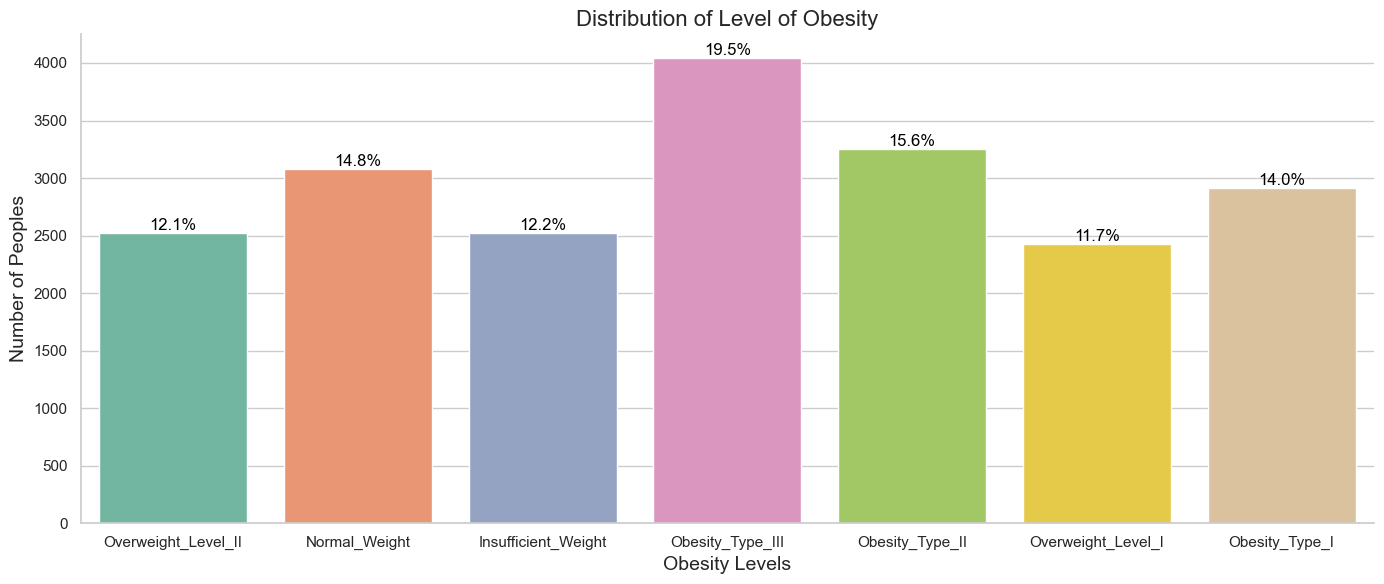

In [9]:
plot_count_with_percentages(train, 'NObeyesdad', title="Distribution of Level of Obesity", xlabel="Obesity Levels", ylabel="Number of Peoples")

In [10]:
train.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [12]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [13]:
import suraj_datalab as sd

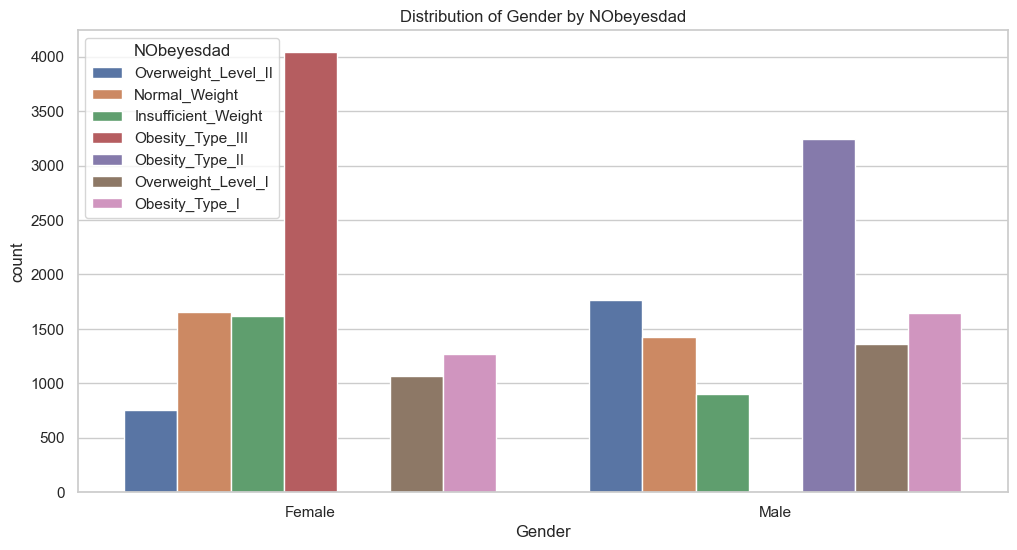

,Total Count,Total Percentage,Overweight_Level_II of Total (%),Normal_Weight of Total (%),Insufficient_Weight of Total (%),Obesity_Type_III of Total (%),Obesity_Type_II of Total (%),Overweight_Level_I of Total (%),Obesity_Type_I of Total (%),Overweight_Level_II within Gender (%),Normal_Weight within Gender (%),Insufficient_Weight within Gender (%),Obesity_Type_III within Gender (%),Obesity_Type_II within Gender (%),Overweight_Level_I within Gender (%),Obesity_Type_I within Gender (%)
Gender,,,,,,,,,,,,,,,,
Female,10422,50.207149,29.936558,53.861129,64.24891,99.876421,0.246305,44.087351,43.539519,7.244291,15.927845,15.553637,38.773748,0.076761,10.266743,12.156976
Male,10336,49.792851,70.063442,46.138871,35.75109,0.123579,99.753695,55.912649,56.460481,17.095588,13.757740,8.726780,0.048375,31.346749,13.128870,15.895898


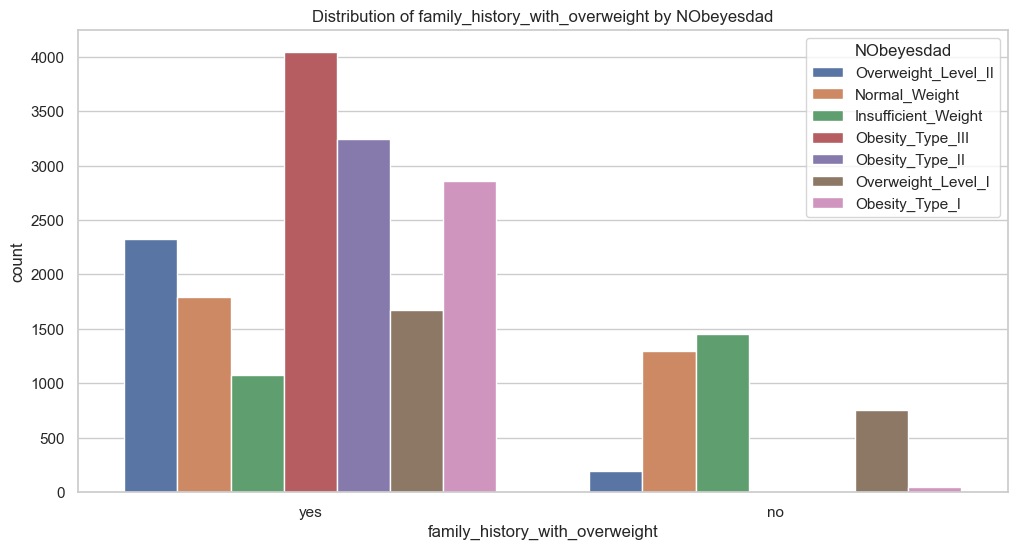

,Total Count,Total Percentage,Overweight_Level_II of Total (%),Normal_Weight of Total (%),Insufficient_Weight of Total (%),Obesity_Type_III of Total (%),Obesity_Type_II of Total (%),Overweight_Level_I of Total (%),Obesity_Type_I of Total (%),Overweight_Level_II within family_history_with_overweight (%),Normal_Weight within family_history_with_overweight (%),Insufficient_Weight within family_history_with_overweight (%),Obesity_Type_III within family_history_with_overweight (%),Obesity_Type_II within family_history_with_overweight (%),Overweight_Level_I within family_history_with_overweight (%),Obesity_Type_I within family_history_with_overweight (%)
family_history_with_overweight,,,,,,,,,,,,,,,,
yes,17014,81.96358,92.347343,58.079169,42.568371,99.975284,99.846059,68.850433,98.350515,13.688727,10.520748,6.312449,23.774539,19.060773,9.821324,16.821441
no,3744,18.03642,7.652657,41.920831,57.431629,0.024716,0.153941,31.149567,1.649485,5.154915,34.508547,38.701923,0.026709,0.133547,20.192308,1.282051


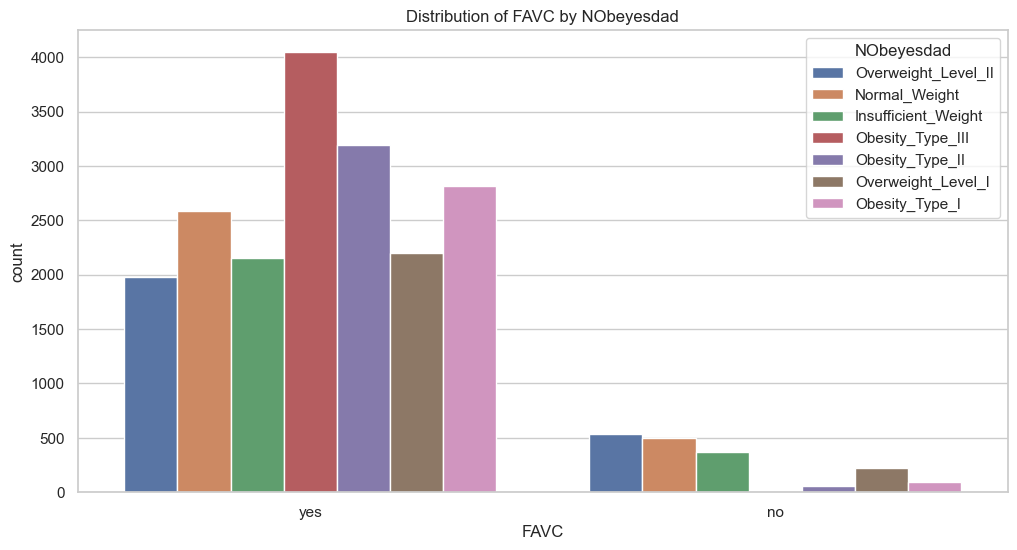

,Total Count,Total Percentage,Overweight_Level_II of Total (%),Normal_Weight of Total (%),Insufficient_Weight of Total (%),Obesity_Type_III of Total (%),Obesity_Type_II of Total (%),Overweight_Level_I of Total (%),Obesity_Type_I of Total (%),Overweight_Level_II within FAVC (%),Normal_Weight within FAVC (%),Insufficient_Weight within FAVC (%),Obesity_Type_III within FAVC (%),Obesity_Type_II within FAVC (%),Overweight_Level_I within FAVC (%),Obesity_Type_I within FAVC (%)
FAVC,,,,,,,,,,,,,,,,
yes,18982,91.444262,78.628073,83.939001,85.334919,99.975284,98.337438,90.770499,96.804124,10.446739,13.628701,11.342324,21.309662,16.826467,11.605732,14.840375
no,1776,8.555738,21.371927,16.060999,14.665081,0.024716,1.662562,9.229501,3.195876,30.349099,27.871622,20.833333,0.056306,3.040541,12.612613,5.236486


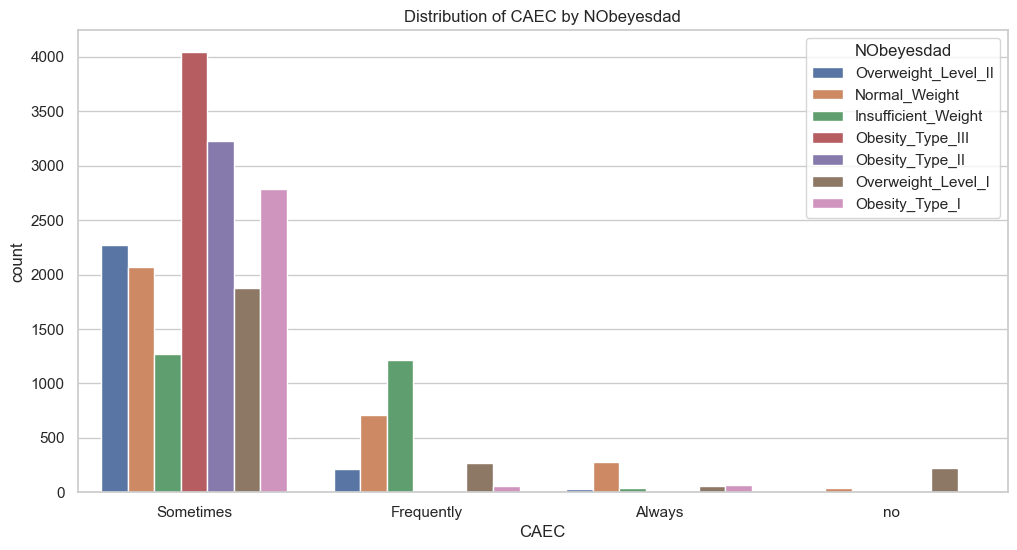

,Total Count,Total Percentage,Overweight_Level_II of Total (%),Normal_Weight of Total (%),Insufficient_Weight of Total (%),Obesity_Type_III of Total (%),Obesity_Type_II of Total (%),Overweight_Level_I of Total (%),Obesity_Type_I of Total (%),Overweight_Level_II within CAEC (%),Normal_Weight within CAEC (%),Insufficient_Weight within CAEC (%),Obesity_Type_III within CAEC (%),Obesity_Type_II within CAEC (%),Overweight_Level_I within CAEC (%),Obesity_Type_I within CAEC (%)
CAEC,,,,,,,,,,,,,,,,
Sometimes,17529,84.444551,90.126883,67.001947,50.257630,99.901137,99.261084,77.255871,95.601375,12.967083,11.780478,7.233727,23.058931,18.392378,10.696560,15.870843
Frequently,2472,11.908662,8.326725,22.907203,48.038050,0.074147,0.369458,11.248455,1.924399,8.495146,28.559871,49.029126,0.121359,0.485437,11.043689,2.265372
Always,478,2.302727,1.308485,8.922777,1.387237,0.024716,0.307882,2.472188,2.199313,6.903766,57.531381,7.322176,0.209205,2.092050,12.552301,13.389121
no,279,1.344060,0.237906,1.168073,0.317083,NaN,0.061576,9.023486,0.274914,2.150538,12.903226,2.867384,NaN,0.716846,78.494624,2.867384


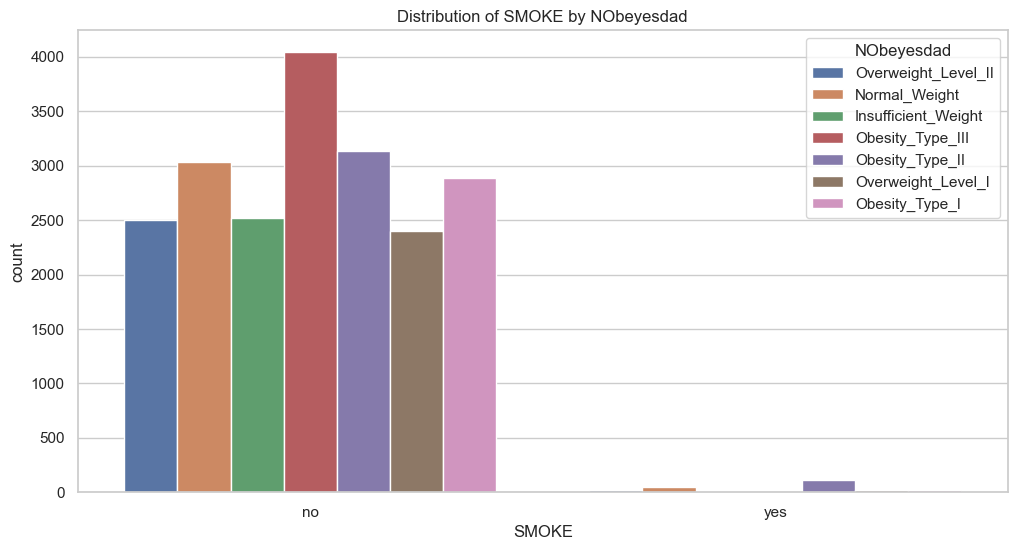

,Total Count,Total Percentage,Overweight_Level_II of Total (%),Normal_Weight of Total (%),Insufficient_Weight of Total (%),Obesity_Type_III of Total (%),Obesity_Type_II of Total (%),Overweight_Level_I of Total (%),Obesity_Type_I of Total (%),Overweight_Level_II within SMOKE (%),Normal_Weight within SMOKE (%),Insufficient_Weight within SMOKE (%),Obesity_Type_III within SMOKE (%),Obesity_Type_II within SMOKE (%),Overweight_Level_I within SMOKE (%),Obesity_Type_I within SMOKE (%)
SMOKE,,,,,,,,,,,,,,,,
no,20513,98.819732,99.008723,98.507463,99.722553,99.901137,96.490148,98.969922,99.175258,12.172768,14.80037,12.265393,19.704578,15.278116,11.709648,14.069127
yes,245,1.180268,0.991277,1.492537,0.277447,0.098863,3.509852,1.030078,0.824742,10.204082,18.77551,2.857143,1.632653,46.530612,10.204082,9.795918


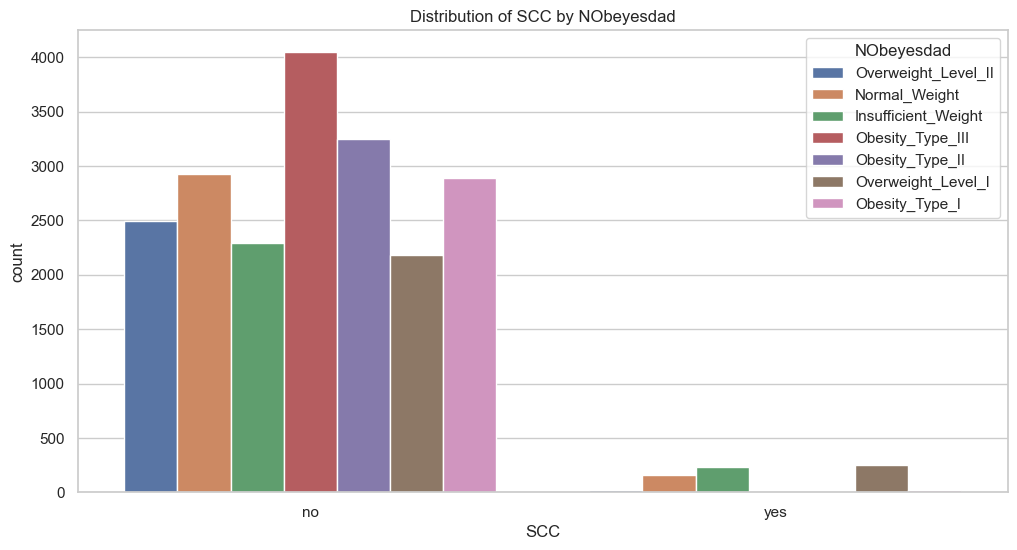

,Total Count,Total Percentage,Overweight_Level_II of Total (%),Normal_Weight of Total (%),Insufficient_Weight of Total (%),Obesity_Type_III of Total (%),Obesity_Type_II of Total (%),Overweight_Level_I of Total (%),Obesity_Type_I of Total (%),Overweight_Level_II within SCC (%),Normal_Weight within SCC (%),Insufficient_Weight within SCC (%),Obesity_Type_III within SCC (%),Obesity_Type_II within SCC (%),Overweight_Level_I within SCC (%),Obesity_Type_I within SCC (%)
SCC,,,,,,,,,,,,,,,,
no,20071,96.690433,99.048374,94.808566,90.804598,100.0,99.876847,89.74042,99.381443,12.445817,14.558318,11.414479,20.158438,16.162623,10.851477,14.408849
yes,687,3.309567,0.951626,5.191434,9.195402,NaN,0.123153,10.25958,0.618557,3.493450,23.289665,33.770015,NaN,0.582242,36.244541,2.620087


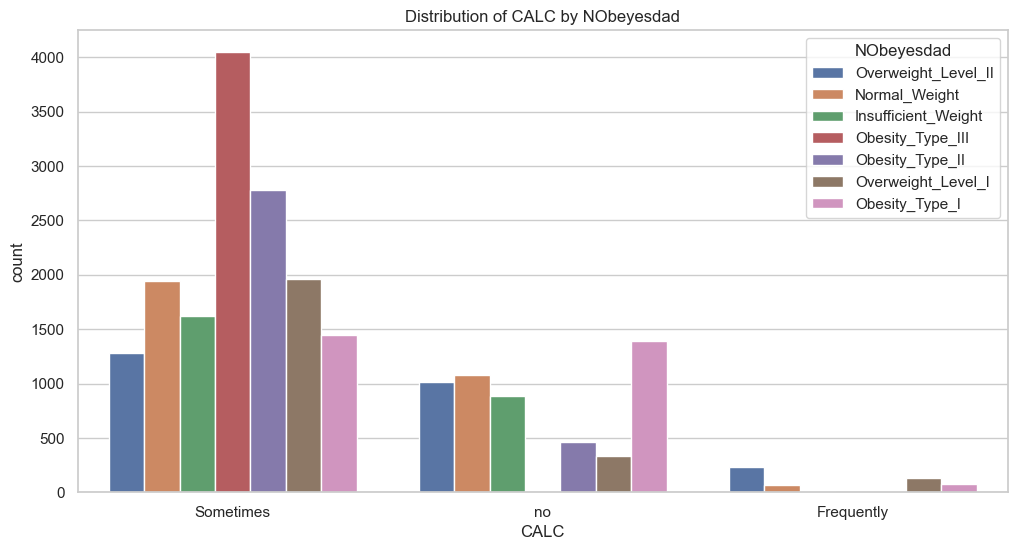

,Total Count,Total Percentage,Overweight_Level_II of Total (%),Normal_Weight of Total (%),Insufficient_Weight of Total (%),Obesity_Type_III of Total (%),Obesity_Type_II of Total (%),Overweight_Level_I of Total (%),Obesity_Type_I of Total (%),Overweight_Level_II within CALC (%),Normal_Weight within CALC (%),Insufficient_Weight within CALC (%),Obesity_Type_III within CALC (%),Obesity_Type_II within CALC (%),Overweight_Level_I within CALC (%),Obesity_Type_I within CALC (%)
CALC,,,,,,,,,,,,,,,,
Sometimes,15066,72.579247,50.713719,62.946139,64.209275,100.0,85.498768,80.758138,49.621993,8.489314,12.876676,10.752688,26.855171,18.432232,13.009425,9.584495
no,5163,24.872338,40.245837,34.847502,35.235830,NaN,14.100985,13.885455,47.766323,19.659113,20.801859,17.218671,NaN,8.870812,6.527213,26.922332
Frequently,529,2.548415,9.040444,2.206360,0.554895,NaN,0.400246,5.356407,2.611684,43.100189,12.854442,2.646503,NaN,2.457467,24.574669,14.366730


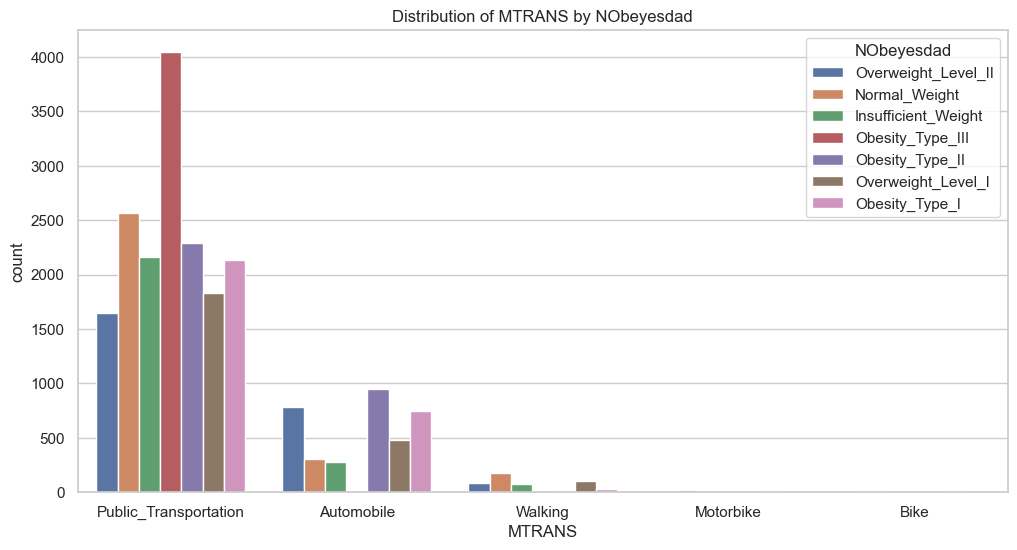

,Total Count,Total Percentage,Overweight_Level_II of Total (%),Normal_Weight of Total (%),Insufficient_Weight of Total (%),Obesity_Type_III of Total (%),Obesity_Type_II of Total (%),Overweight_Level_I of Total (%),Obesity_Type_I of Total (%),Overweight_Level_II within MTRANS (%),Normal_Weight within MTRANS (%),Insufficient_Weight within MTRANS (%),Obesity_Type_III within MTRANS (%),Obesity_Type_II within MTRANS (%),Overweight_Level_I within MTRANS (%),Obesity_Type_I within MTRANS (%)
MTRANS,,,,,,,,,,,,,,,,
Public_Transportation,16687,80.388284,65.384615,83.225178,85.850178,100.0,70.628079,75.607746,73.264605,9.881944,15.371247,12.980164,24.246419,13.747228,10.996584,12.776413
Automobile,3534,17.024762,31.007137,10.025957,10.978993,NaN,29.064039,19.571487,25.670103,22.127900,8.743633,7.838144,NaN,26.711941,13.440860,21.137521
Walking,467,2.249735,3.330690,5.743024,2.933016,NaN,0.184729,4.161516,0.859107,17.987152,37.901499,15.845824,NaN,1.284797,21.627409,5.353319
Motorbike,38,0.183062,0.118953,0.551590,0.158541,NaN,0.092365,0.288422,0.137457,7.894737,44.736842,10.526316,NaN,7.894737,18.421053,10.526316
Bike,32,0.154157,0.158604,0.454250,0.079271,NaN,0.030788,0.370828,0.068729,12.500000,43.750000,6.250000,NaN,3.125000,28.125000,6.250000


In [15]:
for col in categorical_features:
    summary = sd.analyze.categorical_feature(df=train, feature=col, target='NObeyesdad')
    display(summary)

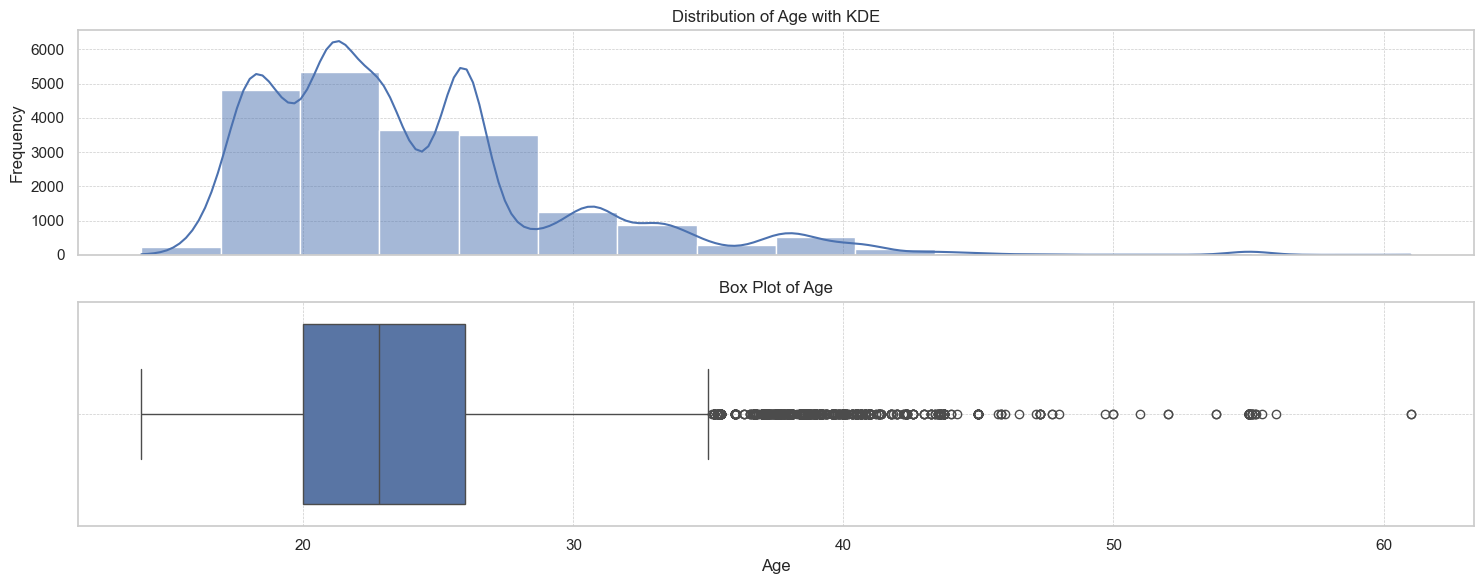

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,5.173909,0.0,5.173909


,count,mean,std,min,25%,50%,75%,max
Age_Overall,20758.0,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.0
Age_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_Upper_Outliers,1074.0,40.129769,4.524898,35.125401,37.638102,38.702213,40.967653,61.0


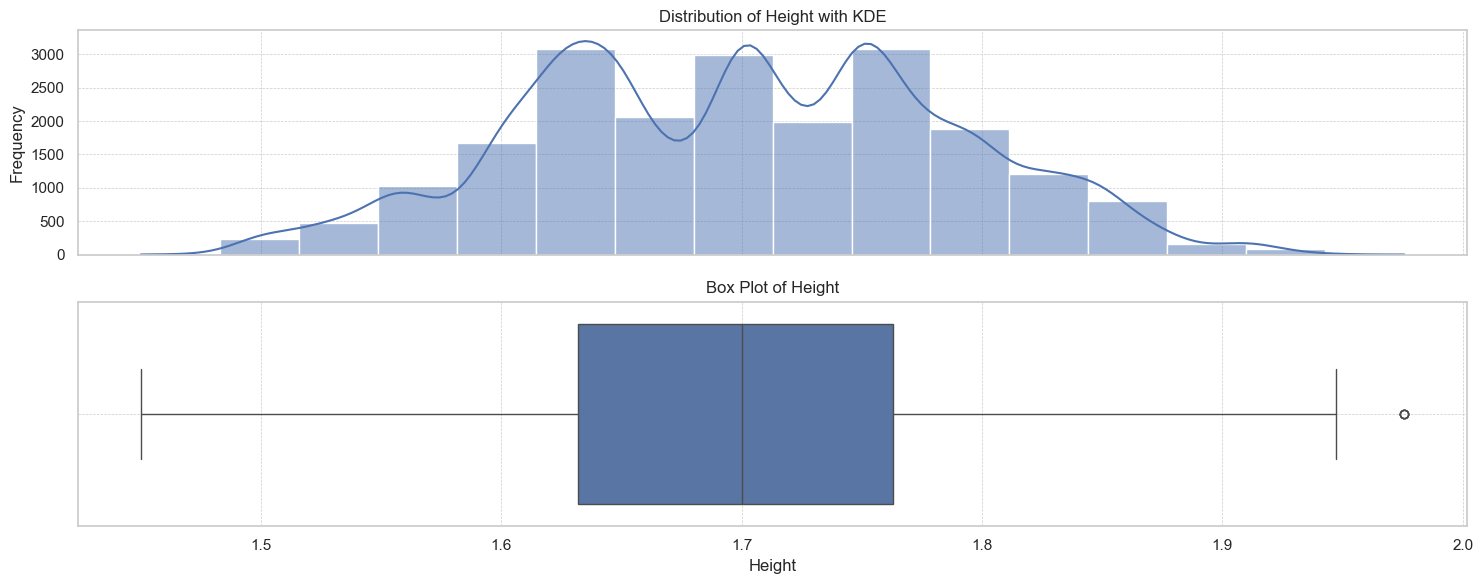

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.01927,0.0,0.01927


,count,mean,std,min,25%,50%,75%,max
Height_Overall,20758.0,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Height_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height_Upper_Outliers,4.0,1.975663,0.000000,1.975663,1.975663,1.975663,1.975663,1.975663


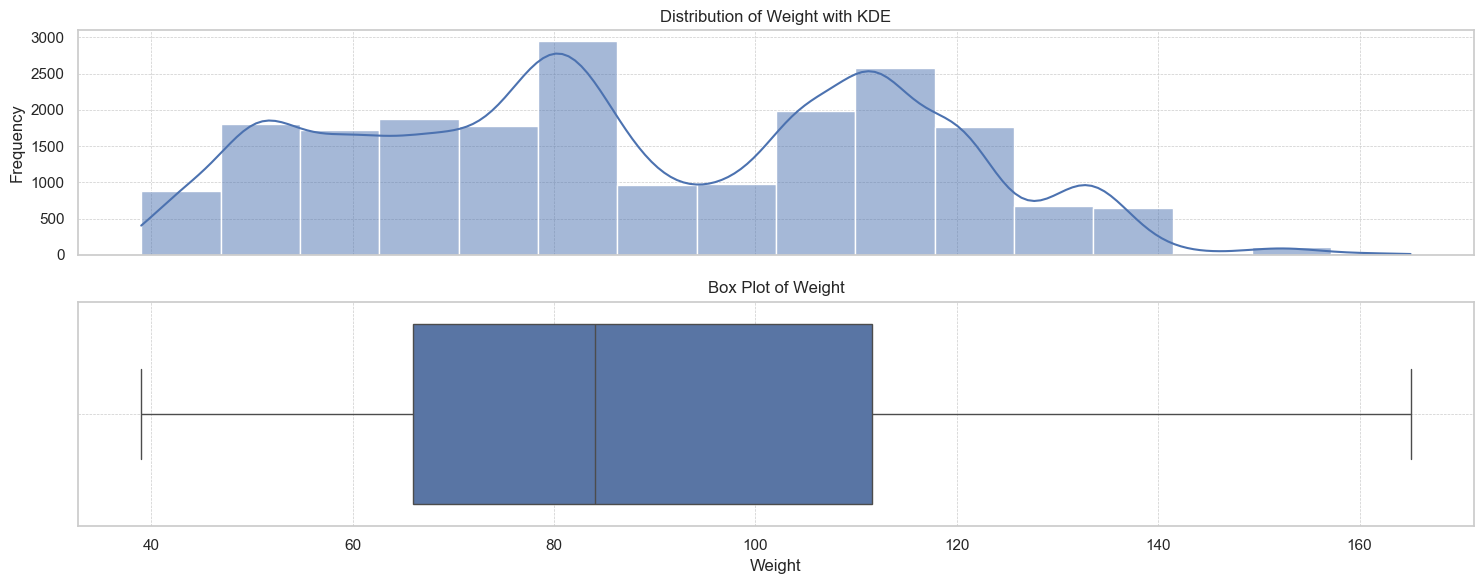

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Weight_Overall,20758.0,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
Weight_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


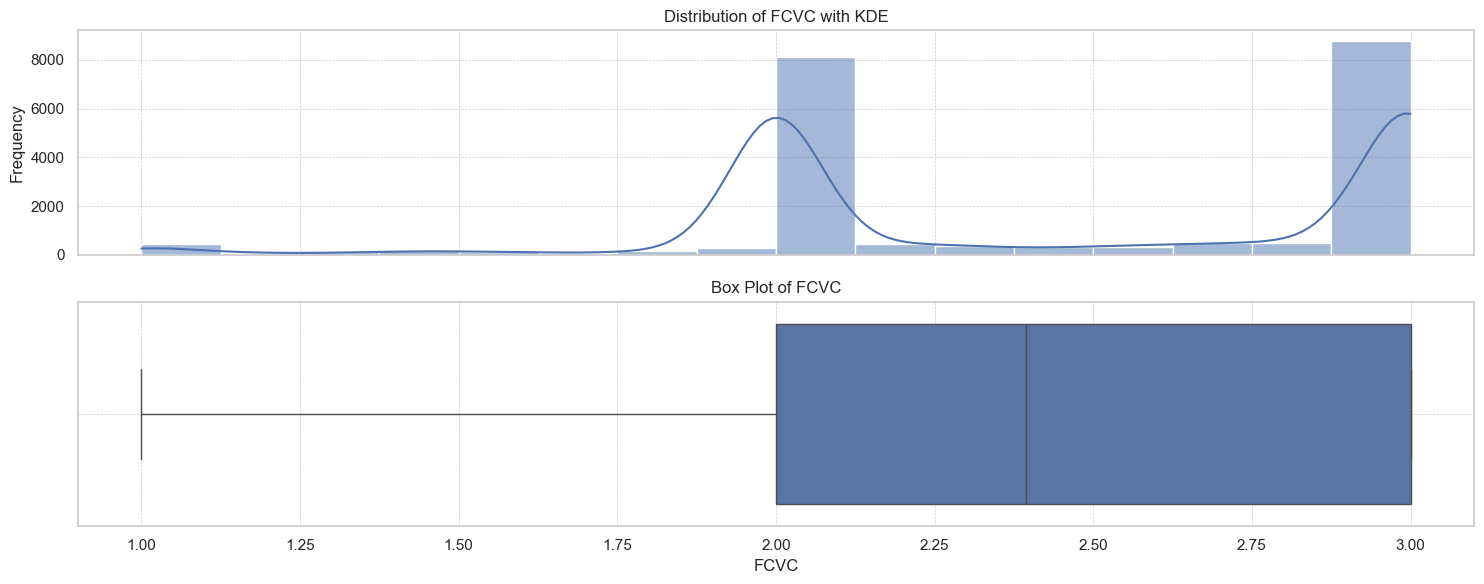

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
FCVC_Overall,20758.0,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
FCVC_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


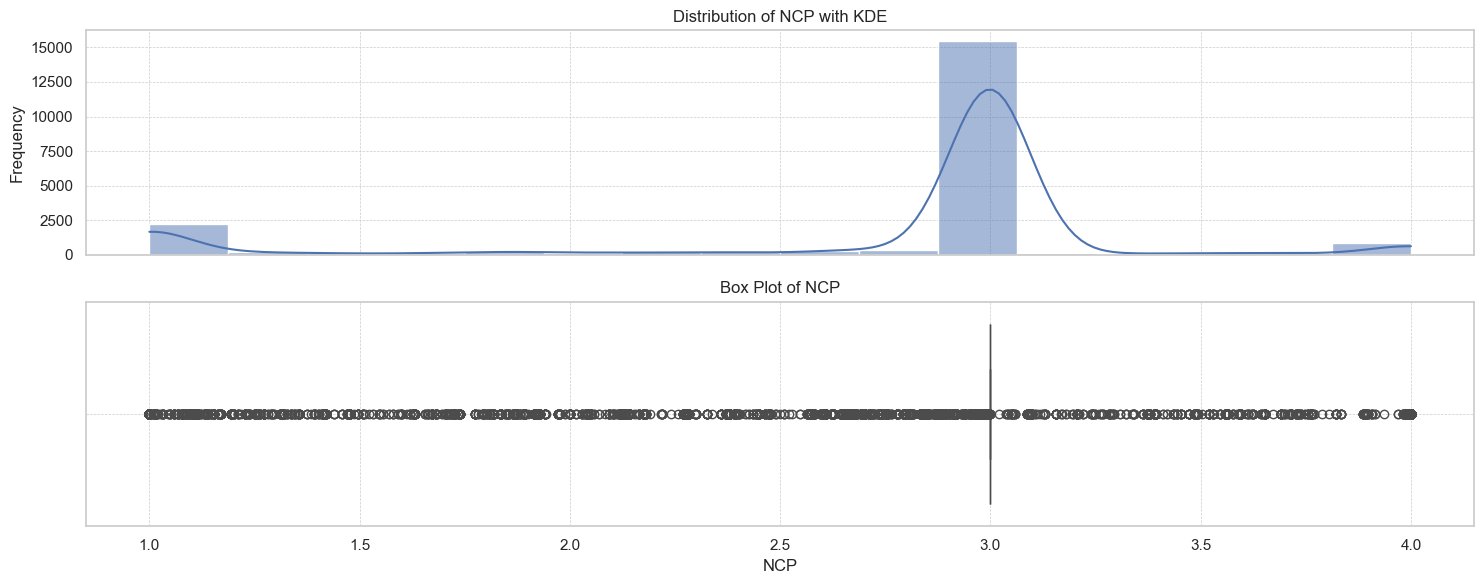

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,29.155025,22.96464,6.190384


,count,mean,std,min,25%,50%,75%,max
NCP_Overall,20758.0,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
NCP_Lower_Outliers,4767.0,1.745669,0.803929,1.000000,1.000000,1.320768,2.652677,2.999744
NCP_Upper_Outliers,1285.0,3.797766,0.295222,3.019574,3.592415,4.000000,4.000000,4.000000


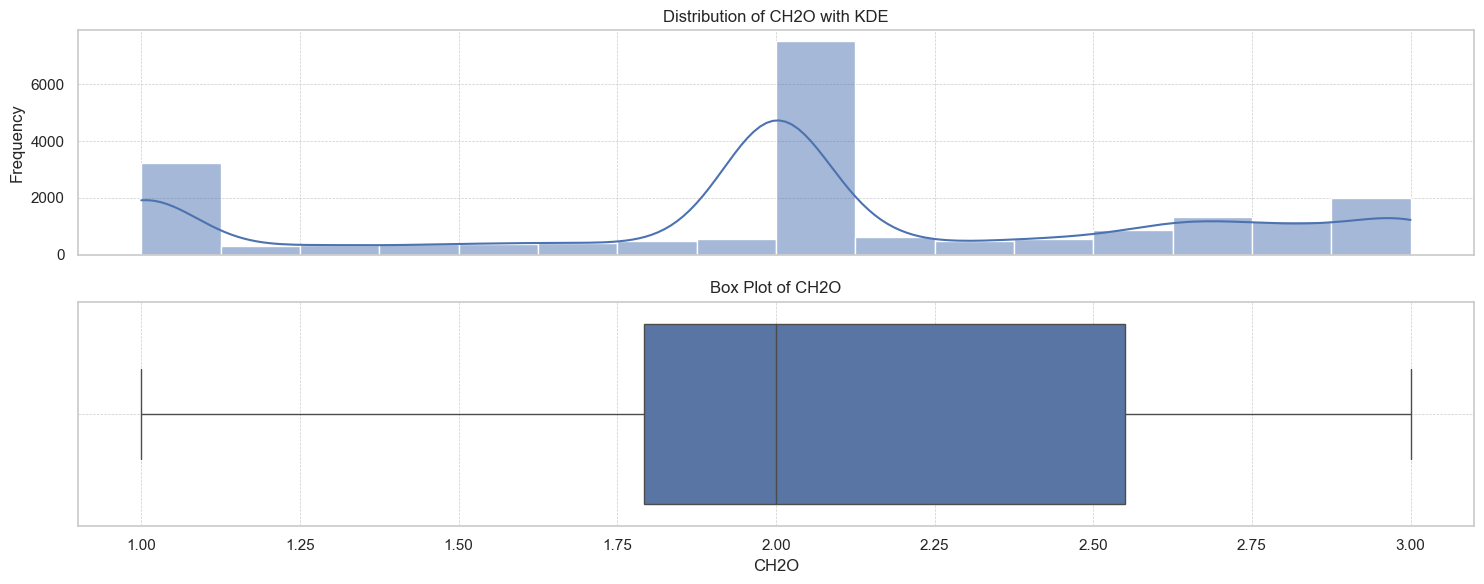

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
CH2O_Overall,20758.0,2.029418,0.608467,1.0,1.792022,2.0,2.549617,3.0
CH2O_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH2O_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


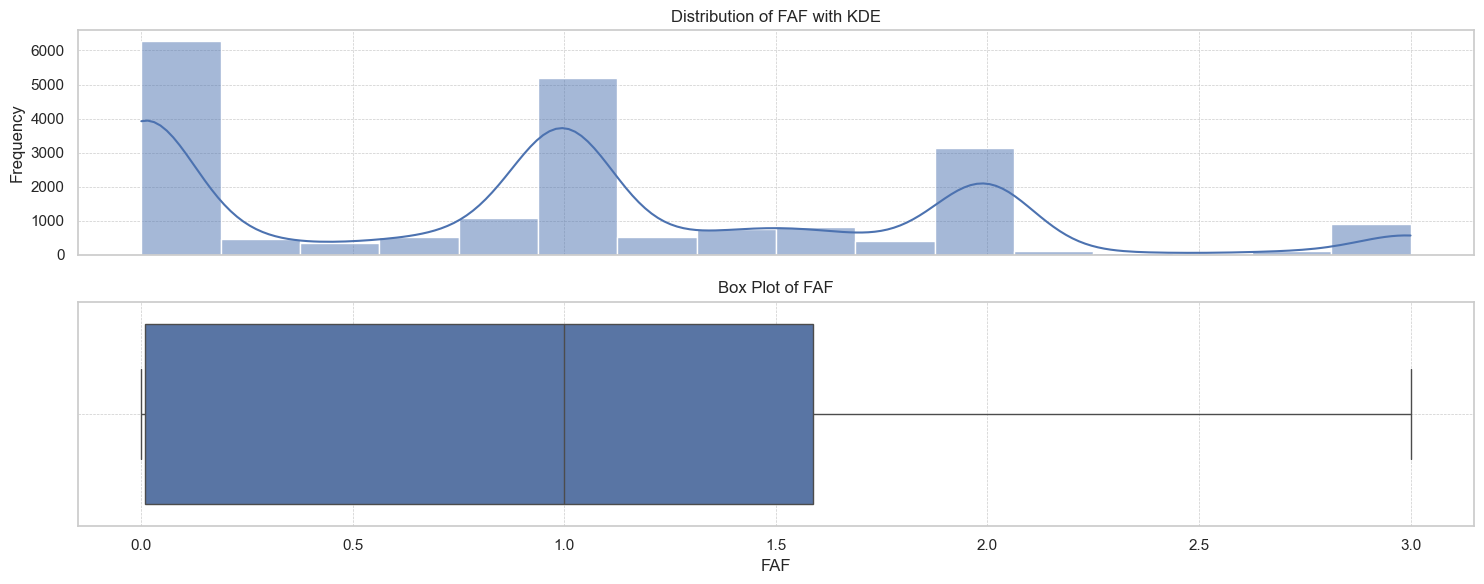

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
FAF_Overall,20758.0,0.981747,0.838302,0.0,0.008013,1.0,1.587406,3.0
FAF_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAF_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


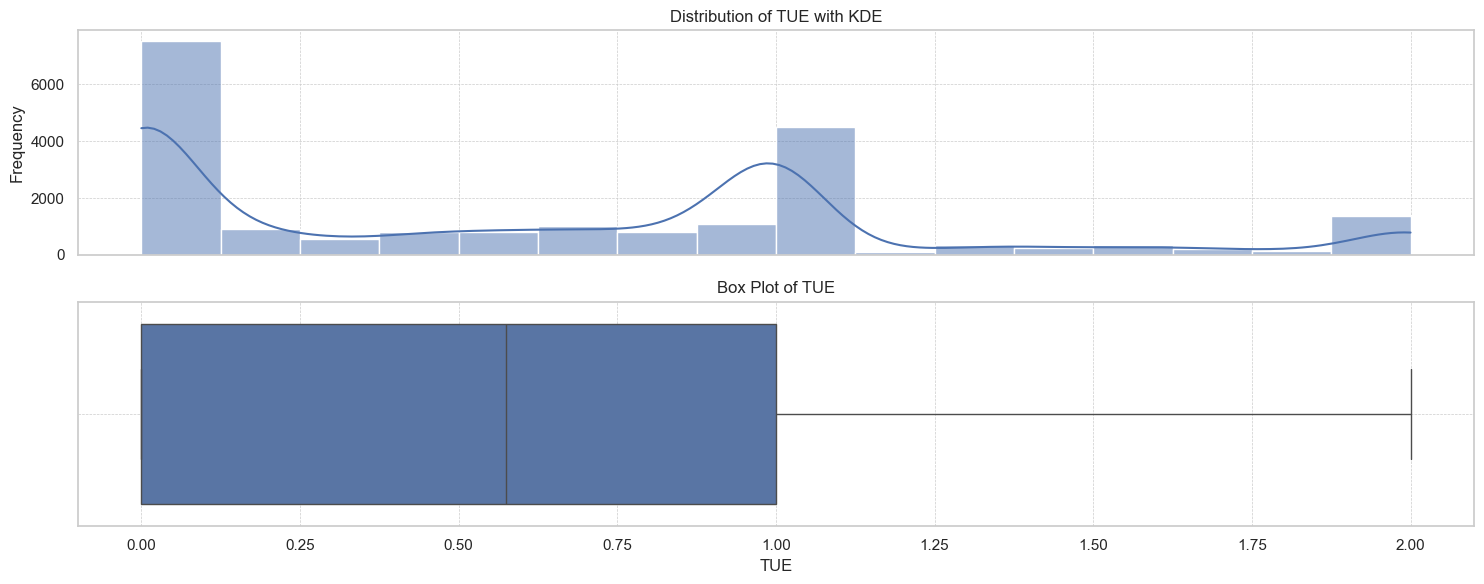

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
TUE_Overall,20758.0,0.616756,0.602113,0.0,0.0,0.573887,1.0,2.0
TUE_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TUE_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for col in numerical_features:
    outliers, summary = sd.analyze.numerical_feature(df=train, feature=col)
    display(outliers)
    display(summary)